In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from plotting import *

import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [31]:
filename1 = 'root_files/histo_pion.root'
filename2 = 'root_files/histo_proton.root'
file1 = uproot.open(filename1)
file2 = uproot.open(filename2)

In [32]:
simtrackstersSC_pion = file1["ticlNtuplizer/simtrackstersSC"]
simtrackstersSC_proton = file2["ticlNtuplizer/simtrackstersSC"]

In [33]:
pion_vx = simtrackstersSC_pion["vertices_x"].array()
pion_vy = simtrackstersSC_pion["vertices_y"].array()
pion_vz = simtrackstersSC_pion["vertices_z"].array()
pion_ve = simtrackstersSC_pion["vertices_energy"].array()
pion_vi = simtrackstersSC_pion["vertices_indexes"].array()
pion_vm = simtrackstersSC_pion["vertices_multiplicity"].array()
pion_vt = simtrackstersSC_pion["vertices_time"].array()
pion_vtErr = simtrackstersSC_pion["vertices_timeErr"].array()
pion_bx = simtrackstersSC_pion["barycenter_x"].array()
pion_by = simtrackstersSC_pion["barycenter_y"].array()
pion_bz = simtrackstersSC_pion["barycenter_z"].array()
pion_be = simtrackstersSC_pion["raw_energy"].array()

proton_vx = simtrackstersSC_proton["vertices_x"].array()
proton_vy = simtrackstersSC_proton["vertices_y"].array()
proton_vz = simtrackstersSC_proton["vertices_z"].array()
proton_ve = simtrackstersSC_proton["vertices_energy"].array()
proton_vi = simtrackstersSC_proton["vertices_indexes"].array()
proton_vm = simtrackstersSC_proton["vertices_multiplicity"].array()
proton_vt = simtrackstersSC_proton["vertices_time"].array()
proton_vtErr = simtrackstersSC_proton["vertices_timeErr"].array()
proton_bx = simtrackstersSC_proton["barycenter_x"].array()
proton_by = simtrackstersSC_proton["barycenter_y"].array()
proton_bz = simtrackstersSC_proton["barycenter_z"].array()
proton_be = simtrackstersSC_proton["raw_energy"].array()

In [34]:
def barTime(vx, vy, vz, ve, vt, vm, bx, by, bz):
    x = vx[vt>-99]
    y = vy[vt>-99]
    z = vz[vt>-99]
    e = ve[vt>-99]
    t = vt[vt>-99]
    m = vm[vt>-99]
    d = (x*x + y*y + z*z)**0.5
    new_t = t - d/C
    # media pesata dei tempi
    tot_en = ak.sum(e, axis=2) 
    w = e / m
    mean = ak.sum(new_t * w, axis=2) / ak.sum(w, axis=2) + (bx*bx+by*by+bz*bz)**0.5/C
    error = 1. / ((ak.sum(w, axis=2))**0.5)
    #TODO: gestire i nan
    return mean, error

In [35]:
pion_bt, pion_btErr = barTime(pion_vx, pion_vy, pion_vz, pion_ve, pion_vt, pion_vm, pion_bx, pion_by, pion_bz)
proton_bt, proton_btErr = barTime(proton_vx, proton_vy, proton_vz, proton_ve, proton_vt, proton_vm, proton_bx, proton_by, proton_bz)

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(
/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


In [36]:
print(f'There are {len(proton_be)} events in the file')

There are 1000 events in the file


## Plot the times

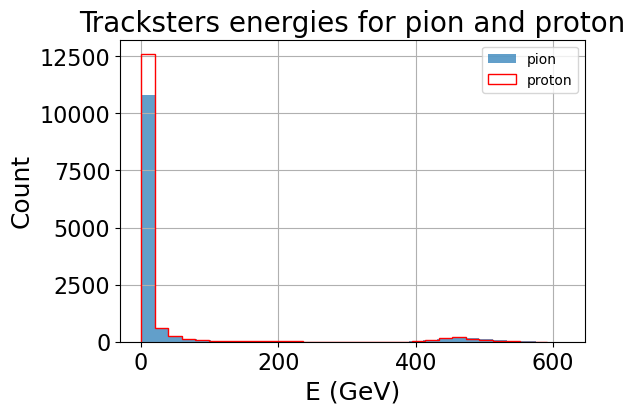

In [37]:
plt.figure(dpi=100)
plt.hist(ak.flatten(pion_be),   bins=30, label='pion', alpha=.7)
plt.hist(ak.flatten(proton_be), bins=30, label='proton', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('Tracksters energies for pion and proton')
plt.xlabel('E (GeV)', size=18)
plt.ylabel('Count', size=18)
plt.show()

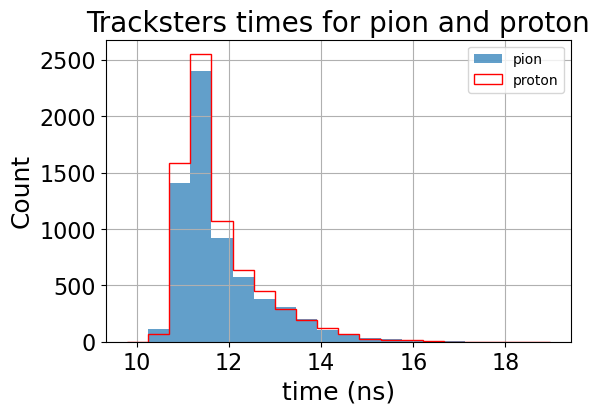

In [40]:
plt.figure(dpi=100)
pion = ak.flatten(pion_bt)
proton = ak.flatten(proton_bt)
plt.hist(pion,   bins=20, label='pion', alpha=.7, range=(min(min(pion), min(proton)), max(max(pion), max(proton))))
plt.hist(proton, bins=20, label='proton', color='r', histtype='step', range=(min(min(pion), min(proton)), max(max(pion), max(proton))))
plt.grid()
plt.legend()
plt.title('Tracksters times for pion and proton')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

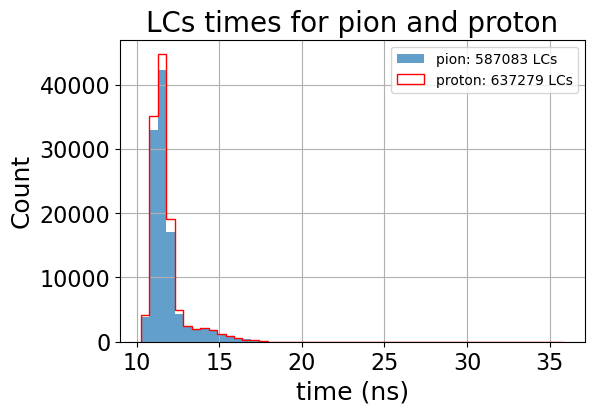

In [39]:
plt.figure(dpi=100)
pion = ak.flatten(ak.flatten(pion_vt)[ak.flatten(pion_vt) > -99])
proton = ak.flatten(ak.flatten(proton_vt)[ak.flatten(proton_vt) > -99])
plt.hist(pion,     bins=50, 
         label=f'pion: {len(ak.flatten(ak.flatten(pion_vt)))} LCs', alpha=.7, range=(min(min(pion), min(proton)), max(max(pion), max(proton))))
plt.hist(proton, bins=50, 
         label=f'proton: {len(ak.flatten(ak.flatten(proton_vt)))} LCs', color='r', histtype='step', range=(min(min(pion), min(proton)), max(max(pion), max(proton))))
plt.grid()
plt.legend()
plt.title('LCs times for pion and proton')
plt.xlabel('time (ns)', size=18)
plt.ylabel('Count', size=18)
#plt.xlim(10,20)
plt.show()

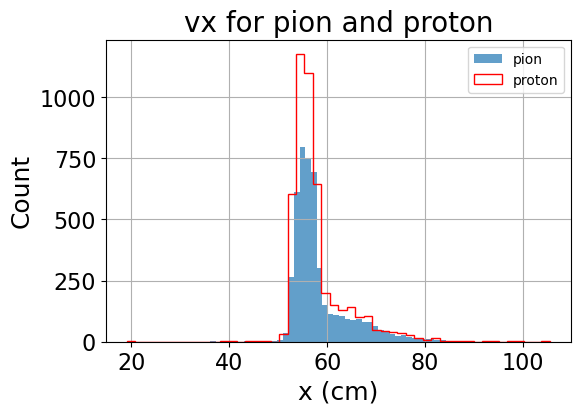

In [12]:
plt.figure(dpi=100)
plt.hist(ak.flatten(ak.flatten(pion_vx)[ak.flatten(pion_vt) > -99]),     bins=50, label='pion', alpha=.7)
plt.hist(ak.flatten(ak.flatten(proton_vx)[ak.flatten(proton_vt) > -99]), bins=50, label='proton', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('vx for pion and proton')
plt.xlabel('x (cm)', size=18)
plt.ylabel('Count', size=18)
#plt.xlim(10,20)
plt.show()

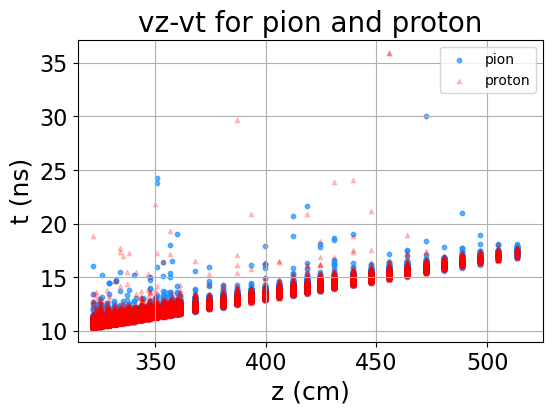

In [12]:
plt.figure(dpi=100)
plt.scatter(ak.flatten(ak.flatten(pion_vz)[ak.flatten(pion_vt) > -99]), ak.flatten(ak.flatten(pion_vt)[ak.flatten(pion_vt) > -99]),
         c='dodgerblue', label='pion', alpha=.7, s= 10, marker='o')
plt.scatter(ak.flatten(ak.flatten(proton_vz)[ak.flatten(proton_vt) > -99]), ak.flatten(ak.flatten(proton_vt)[ak.flatten(proton_vt) > -99]),
         label='proton', color='r', alpha=.2, s= 10, marker='^')
plt.grid()
plt.legend()
plt.title('vz-vt for pion and proton')
plt.xlabel('z (cm)', size=18)
plt.ylabel('t (ns)', size=18)
plt.xlim(315,525)
plt.show()

## Visual representation

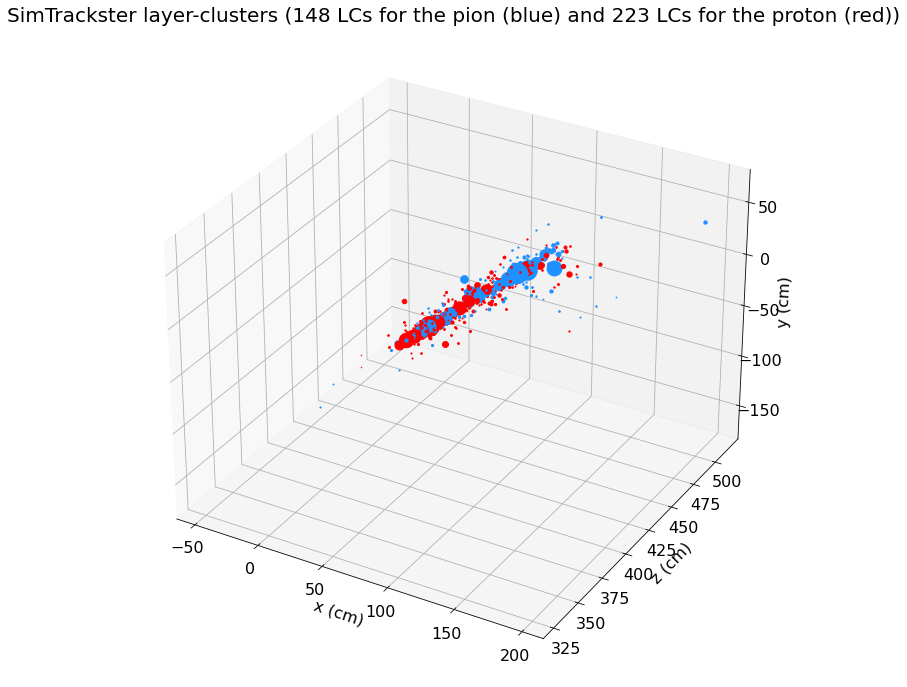

In [19]:
eid   = 0
tr_id = 0

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

for x, y, z, e in zip(pion_vx[eid][tr_id], pion_vy[eid][tr_id], pion_vz[eid][tr_id], pion_ve[eid][tr_id]):
    ax1.scatter(x, z, y, s=8*e, c='dodgerblue')

for x, y, z, e in zip(proton_vx[eid][tr_id], proton_vy[eid][tr_id], proton_vz[eid][tr_id], proton_ve[eid][tr_id]):
    ax1.scatter(x, z, y, s=8*e, c='red')

ax1.set_title(f"SimTrackster layer-clusters ({len(pion_vx[eid][tr_id])} LCs for the pion (blue) and {len(proton_vx[eid][tr_id])} LCs for the proton (red))")
plt.show()

In [52]:
%matplotlib widget
eid=29
tr_id=1
C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")

blue = 0
#for tr_id in range(len(pion_vx[eid])):
for x, y, z, e, t in zip(pion_vx[eid][tr_id], pion_vy[eid][tr_id], pion_vz[eid][tr_id], pion_ve[eid][tr_id], pion_vt[eid][tr_id]):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='dodgerblue', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t) , size=10) #+ (x**2+y**2+z**2)**0.5/C)
        blue += 1

red = 0
#for tr_id in range(len(proton_vx[eid])):
for x, y, z, e, t in zip(proton_vx[eid][tr_id], proton_vy[eid][tr_id], proton_vz[eid][tr_id], proton_ve[eid][tr_id], proton_vt[eid][tr_id]):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='r', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t), size=10) #+ (x**2+y**2+z**2)**0.5/C
        red += 1

ax1.set_title(f"SimTrackster layer-clusters with time\n({blue} LCs for the pion (blue) and {red} LCs for the proton (red))")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [136]:
def to_array(old1, old2):
    a = np.max([len(x) for x in old1])
    b = np.max([len(x) for x in old2])
    max_len=max(a, b)
    X1 = [np.pad(x, (0, max_len - len(x)), mode='constant') if len(x) < max_len else x[:max_len] for x in old1]
    X2 = [np.pad(x, (0, max_len - len(x)), mode='constant') if len(x) < max_len else x[:max_len] for x in old2]
    return np.vstack((np.array(X1),np.array(X2)))

In [144]:
# così sono tutti lunghi uguali
# farlo anche per y, z, t e protone
x = to_array(ak.flatten(pion_vx[pion_vt>-99.], axis=2), ak.flatten(proton_vx[proton_vt>-99.], axis=2))
y = to_array(ak.flatten(pion_vy[pion_vt>-99.], axis=2), ak.flatten(proton_vy[proton_vt>-99.], axis=2))
z = to_array(ak.flatten(pion_vz[pion_vt>-99.], axis=2), ak.flatten(proton_vz[proton_vt>-99.], axis=2))
t = to_array(ak.flatten(pion_vt[pion_vt>-99.], axis=2), ak.flatten(proton_vt[proton_vt>-99.], axis=2))
# fare un unico big array o un pandas e aggiungere Y per label

In [85]:
# reshape in (0,1) before joining
# train test split
# what to use

pion = ak.Array({'x':  ak.flatten(pion_vx[pion_vt>-99.], axis=2), 
                  'y': ak.flatten(pion_vy[pion_vt>-99.], axis=2),
                  'z': ak.flatten(pion_vz[pion_vt>-99.], axis=2),
                  't': ak.flatten(pion_vt[pion_vt>-99.], axis=2),
                  'l': ak.flatten(pion_vt[pion_vt>-99.]*0, axis=2)
                  })
proton = ak.Array({'x': ak.flatten(proton_vx[proton_vt>-99.], axis=2), 
                    'y': ak.flatten(proton_vy[proton_vt>-99.], axis=2),
                    'z': ak.flatten(proton_vz[proton_vt>-99.], axis=2),
                    't': ak.flatten(proton_vt[proton_vt>-99.], axis=2),
                    'l': ak.flatten(proton_vt[proton_vt>-99.]*0 + 1, axis=2)
                    })

In [111]:
a = ak.concatenate((pion,proton), axis=0)
X = ak.to_pandas(a)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

# assume X is the variable length arrays and y is the labels
# preprocess the data by padding/truncating to a fixed length
max_len=500
X = [np.pad(x, (0, max_len - len(x)), mode='constant') if len(x) < max_len else x[:max_len] for x in X]
X = np.array(X)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the decision tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# test the model
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

TypeError: Singleton array array(25.37639809) cannot be considered a valid collection.

In [ ]:
import tensorflow as tf 

x = tf.ragged.constant(x)

keras_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[None, 5], dtype=tf.float64, ragged=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Activation(tf.nn.relu),
    tf.keras.layers.Dense(5)
])

keras_model.compile(optimizer='rmsprop', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True))
keras_model.fit(x, y, epochs=100)